In [19]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt


## Read Data

In [20]:
guest_test = pd.read_csv('https://raw.githubusercontent.com/GustavoFabricio/Machine_Learning_Hotel/master/test.csv')
guest_train = pd.read_csv('https://raw.githubusercontent.com/GustavoFabricio/Machine_Learning_Hotel/master/train.csv')

guest_train.head()

,Guest_ID,Gender,Frequent_Traveler,Age,Type,Flight_Class,Points,Room,Check-in/Check-out,F&B,...,Spa,Staff,Pool,Baggage_Handling,Reception,Cleanliness,Online_Booking,Deposit_Kept,Time_Room_Service,Repeater
0,19346,Male,1,30,Business travel,Eco,2695,3,5,5,...,4,2,3,3,3,3,3,187,20.2,0
1,21830,Male,1,57,Personal Travel,Eco,2057,2,1,2,...,3,2,5,3,4,3,3,0,1.2,0
2,17626,Female,1,16,Personal Travel,Eco,1478,2,2,2,...,4,4,4,4,3,4,5,0,0.0,1
3,17988,Female,1,48,Business travel,Business,2304,3,1,1,...,1,2,4,4,3,2,3,147,15.0,0
4,16703,Female,1,52,Business travel,Eco,73,3,3,3,...,3,3,3,3,4,3,3,6,1.0,1


In [21]:
guest_train.dtypes

Guest_ID                int64
Gender                 object
Frequent_Traveler       int64
Age                     int64
Type                   object
Flight_Class           object
Points                  int64
Room                    int64
Check-in/Check-out      int64
F&B                     int64
Location                int64
Wifi                    int64
Entertainment           int64
Gym                     int64
Spa                     int64
Staff                   int64
Pool                    int64
Baggage_Handling        int64
Reception               int64
Cleanliness             int64
Online_Booking          int64
Deposit_Kept            int64
Time_Room_Service     float64
Repeater                int64
dtype: object

In [22]:
guest_train.shape

(9100, 24)

## Overview


In [23]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature].astype('str'), df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(10, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()

#### Age

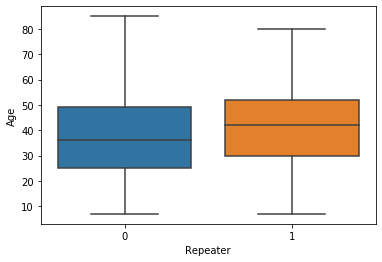

In [24]:
sns.boxplot(y = guest_train['Age'], x = guest_train['Repeater'])

#### Points

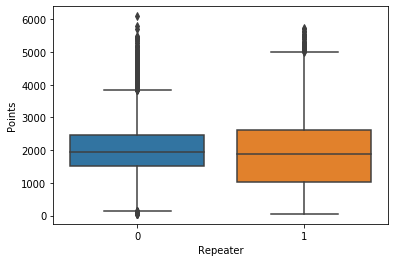

In [25]:
sns.boxplot(y = guest_train['Points'], x = guest_train['Repeater'])

#### Deposit_Kept

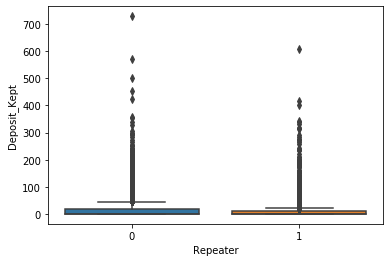

In [26]:
sns.boxplot(y = guest_train['Deposit_Kept'], x = guest_train['Repeater'])

#### Time_Room_Service

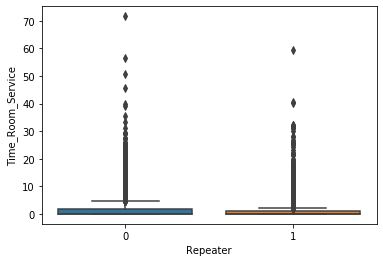

In [27]:
sns.boxplot(y = guest_train['Time_Room_Service'], x = guest_train['Repeater'])

#### Gender

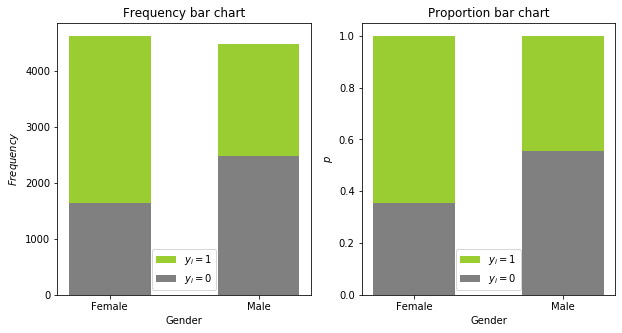

In [28]:
bar_charts_categorical(guest_train, 'Gender', 'Repeater')

In [29]:
# Creating a dummy Variable for Female
guest_train_d = pd.concat([guest_train, pd.get_dummies(guest_train['Gender'])], axis = 1).drop(columns=['Gender','Male'])
guest_test_d = pd.concat([guest_test, pd.get_dummies(guest_test['Gender'])], axis = 1).drop(columns=['Gender','Male'])

guest_train_d.head()

,Guest_ID,Frequent_Traveler,Age,Type,Flight_Class,Points,Room,Check-in/Check-out,F&B,Location,...,Staff,Pool,Baggage_Handling,Reception,Cleanliness,Online_Booking,Deposit_Kept,Time_Room_Service,Repeater,Female
0,19346,1,30,Business travel,Eco,2695,3,5,5,5,...,2,3,3,3,3,3,187,20.2,0,0
1,21830,1,57,Personal Travel,Eco,2057,2,1,2,4,...,2,5,3,4,3,3,0,1.2,0,0
2,17626,1,16,Personal Travel,Eco,1478,2,2,2,2,...,4,4,4,3,4,5,0,0.0,1,1
3,17988,1,48,Business travel,Business,2304,3,1,1,1,...,2,4,4,3,2,3,147,15.0,0,1
4,16703,1,52,Business travel,Eco,73,3,3,3,3,...,3,3,3,4,3,3,6,1.0,1,1


#### Frequent Traveler 

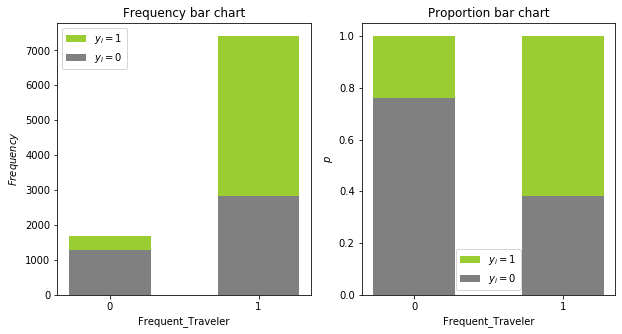

In [30]:
bar_charts_categorical(guest_train, 'Frequent_Traveler', 'Repeater')

#### Type of Booking

In [31]:
#Creating dummy for Business Travel
guest_train_d = pd.concat([guest_train_d, pd.get_dummies(guest_train_d['Type'])], axis = 1).drop(columns=['Type','Personal Travel'])
guest_test_d = pd.concat([guest_test_d, pd.get_dummies(guest_test_d['Type'])], axis = 1).drop(columns=['Type','Personal Travel'])
guest_train_d.head()

,Guest_ID,Frequent_Traveler,Age,Flight_Class,Points,Room,Check-in/Check-out,F&B,Location,Wifi,...,Pool,Baggage_Handling,Reception,Cleanliness,Online_Booking,Deposit_Kept,Time_Room_Service,Repeater,Female,Business travel
0,19346,1,30,Eco,2695,3,5,5,5,2,...,3,3,3,3,3,187,20.2,0,0,1
1,21830,1,57,Eco,2057,2,1,2,4,3,...,5,3,4,3,3,0,1.2,0,0,0
2,17626,1,16,Eco,1478,2,2,2,2,3,...,4,4,3,4,5,0,0.0,1,1,0
3,17988,1,48,Business,2304,3,1,1,1,3,...,4,4,3,2,3,147,15.0,0,1,1
4,16703,1,52,Eco,73,3,3,3,3,1,...,3,3,4,3,3,6,1.0,1,1,1


#### Flight_Class

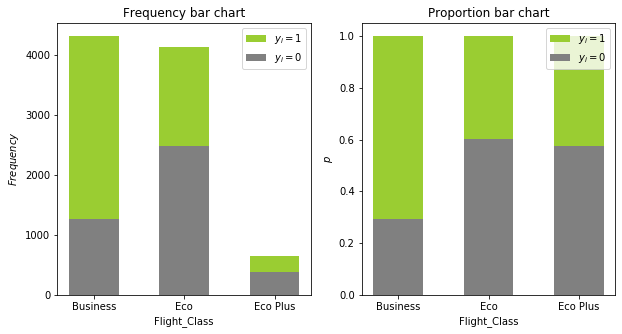

In [32]:
bar_charts_categorical(guest_train, 'Flight_Class', 'Repeater')

In [33]:
# Creating dummy for Business and Eco 
guest_train_d = pd.concat([guest_train_d, pd.get_dummies(guest_train_d['Flight_Class'])], axis = 1).drop(columns=['Flight_Class','Eco Plus', 'Eco'])
guest_test_d = pd.concat([guest_test_d, pd.get_dummies(guest_test_d['Flight_Class'])], axis = 1).drop(columns=['Flight_Class','Eco Plus', 'Eco'])

guest_train_d.head()

,Guest_ID,Frequent_Traveler,Age,Points,Room,Check-in/Check-out,F&B,Location,Wifi,Entertainment,...,Baggage_Handling,Reception,Cleanliness,Online_Booking,Deposit_Kept,Time_Room_Service,Repeater,Female,Business travel,Business
0,19346,1,30,2695,3,5,5,5,2,3,...,3,3,3,3,187,20.2,0,0,1,0
1,21830,1,57,2057,2,1,2,4,3,2,...,3,4,3,3,0,1.2,0,0,0,0
2,17626,1,16,1478,2,2,2,2,3,4,...,4,3,4,5,0,0.0,1,1,0,0
3,17988,1,48,2304,3,1,1,1,3,3,...,4,3,2,3,147,15.0,0,1,1,1
4,16703,1,52,73,3,3,3,3,1,2,...,3,4,3,3,6,1.0,1,1,1,0


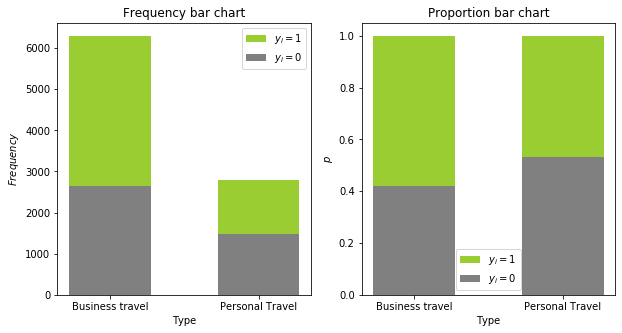

In [34]:
bar_charts_categorical(guest_train, 'Type', 'Repeater')

#### Correlation Matrix

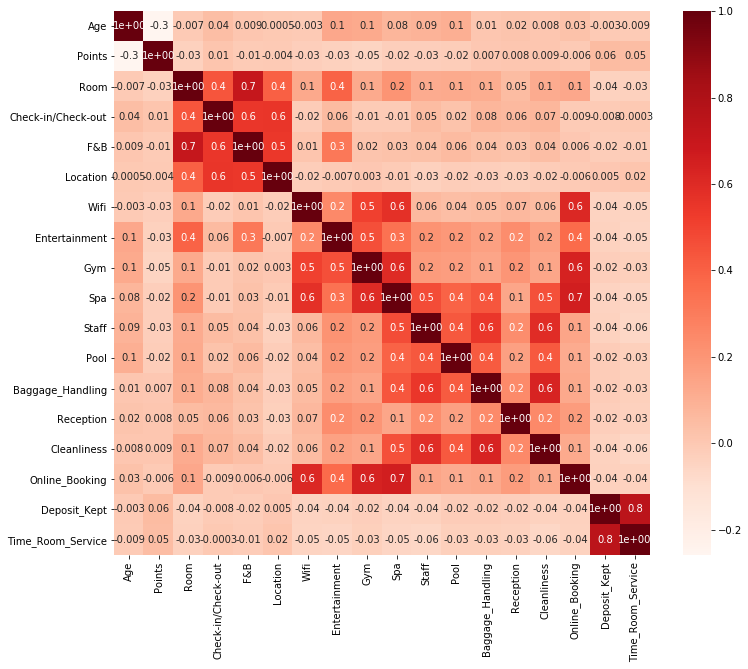

In [35]:
import seaborn as sns
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

cor_heatmap(guest_train_d.iloc[:,2:-4].corr(method = 'spearman')) #'pearson'

In [36]:
guest_train_d.groupby('Repeater').mean()

,Guest_ID,Frequent_Traveler,Age,Points,Room,Check-in/Check-out,F&B,Location,Wifi,Entertainment,...,Pool,Baggage_Handling,Reception,Cleanliness,Online_Booking,Deposit_Kept,Time_Room_Service,Female,Business travel,Business
Repeater,,,,,,,,,,,,,,,,,,,,,
0,16542.864616,0.688787,37.431339,2012.948414,2.470090,3.011141,2.671591,3.012836,2.927101,2.627028,...,3.062243,3.38048,2.960039,3.377815,2.896827,18.125938,1.879244,0.397675,0.639380,0.306127
1,16534.214444,0.918930,41.138000,1933.020720,3.160732,2.947697,3.013478,2.970227,3.499497,4.030779,...,3.855160,3.95514,3.648964,3.972641,3.723396,11.667673,1.180286,0.599477,0.735466,0.613961


In [37]:
guest_train_d.drop(columns= ['Guest_ID', 'Time_Room_Service'], inplace = True)
guest_test_d.drop(columns= [            'Time_Room_Service'], inplace = True)
guest_train_d.head()

,Frequent_Traveler,Age,Points,Room,Check-in/Check-out,F&B,Location,Wifi,Entertainment,Gym,...,Pool,Baggage_Handling,Reception,Cleanliness,Online_Booking,Deposit_Kept,Repeater,Female,Business travel,Business
0,1,30,2695,3,5,5,5,2,3,3,...,3,3,3,3,3,187,0,0,1,0
1,1,57,2057,2,1,2,4,3,2,3,...,5,3,4,3,3,0,0,0,0,0
2,1,16,1478,2,2,2,2,3,4,4,...,4,4,3,4,5,0,1,1,0,0
3,1,48,2304,3,1,1,1,3,3,3,...,4,4,3,2,3,147,0,1,1,1
4,1,52,73,3,3,3,3,1,2,4,...,3,3,4,3,3,6,1,1,1,0


In [38]:
guest_train_d['Total_Score'] = guest_train_d.loc[:,['Room', 'Check-in/Check-out','F&B', 'Wifi', 'Entertainment', 'Gym', 'Spa', 'Staff', 'Pool','Baggage_Handling', 'Reception', 'Cleanliness', 'Online_Booking', 'Location']].sum(axis=1)
guest_test_d['Total_Score'] = guest_test_d.loc[:,['Room', 'Check-in/Check-out', 'F&B',  'Wifi', 'Entertainment', 'Gym', 'Spa', 'Staff', 'Pool','Baggage_Handling', 'Reception', 'Cleanliness', 'Online_Booking', 'Location']].sum(axis=1)

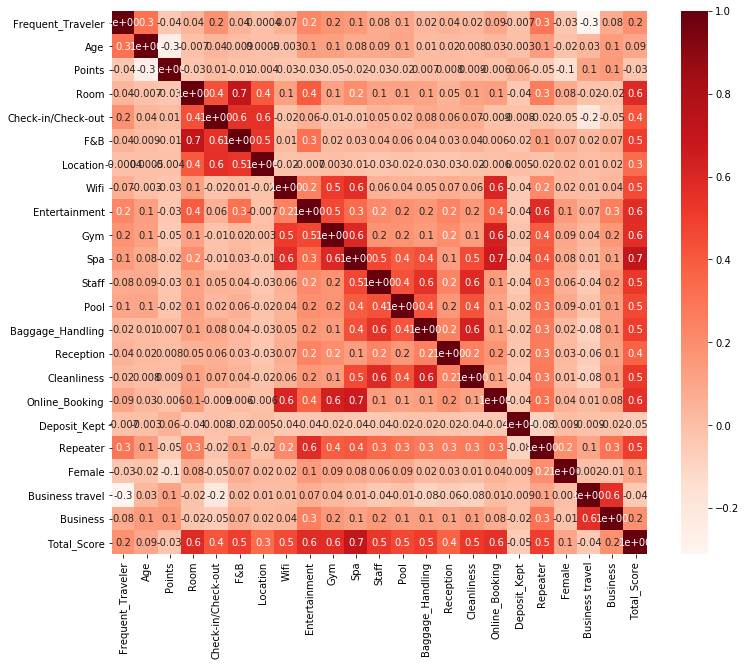

In [39]:
cor_heatmap(guest_train_d.iloc[:,:].corr(method = 'spearman')) 

In [40]:
guest_train_d.groupby('Repeater').mean()

,Frequent_Traveler,Age,Points,Room,Check-in/Check-out,F&B,Location,Wifi,Entertainment,Gym,...,Pool,Baggage_Handling,Reception,Cleanliness,Online_Booking,Deposit_Kept,Female,Business travel,Business,Total_Score
Repeater,,,,,,,,,,,,,,,,,,,,,
0,0.688787,37.431339,2012.948414,2.470090,3.011141,2.671591,3.012836,2.927101,2.627028,2.964640,...,3.062243,3.38048,2.960039,3.377815,2.896827,18.125938,0.397675,0.639380,0.306127,41.243643
1,0.918930,41.138000,1933.020720,3.160732,2.947697,3.013478,2.970227,3.499497,4.030779,3.971233,...,3.855160,3.95514,3.648964,3.972641,3.723396,11.667673,0.599477,0.735466,0.613961,50.589016


### Train Test Split

In [41]:
X = guest_train_d.drop(columns = ['Repeater'])
y = guest_train_d.loc[:,'Repeater']
X.shape

(9100, 22)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 30,
                                                    shuffle = True)

### Standardzation

In [43]:
##### Min - Max (0 - 1)

from sklearn.preprocessing import MinMaxScaler

min_max_01 = MinMaxScaler().fit(X_train)
X_train_MM01 = min_max_01.transform(X_train)
X_test_MM01 = min_max_01.transform(X_test)

#### Min - Max (-1, 1)

min_max_11 = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train_MM11 = min_max_11.transform(X_train)
X_test_MM11 = min_max_11.transform(X_test)


#### Standard

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [44]:
def Model_score(X, y, model, k):
    num_val_samples = len(X) // k  # numero de observações em cada base
    acc_test = []
    acc_train = []#onde iremos guardar as 4 metricas de avaliação do modelo
    
    for i in range(k):
        print('processing fold #', i)
        val_data = X[i * num_val_samples: (i+1) * num_val_samples]
        val_targets = y[i * num_val_samples: (i + 1) * num_val_samples]
    
        partial_train_data = np.concatenate(
            [X[:i * num_val_samples],
             X[(i + 1) * num_val_samples:]],
            axis = 0)
    
        partial_train_targets = np.concatenate(
            [y[:i * num_val_samples],
             y[(i + 1) * num_val_samples:]],
            axis = 0)                                          # até aqui apenas um processo de dividir o validation and training set
    
        model.fit(partial_train_data, partial_train_targets)
        valacc = model.score(val_data, val_targets)
        trainacc = model.score(partial_train_data, partial_train_targets)
        acc_test.append(round(valacc,4))
        acc_train.append(round(trainacc,4))
    print(' ')
    print('\033[1m' + 'Training '+'\033[0m',' - Highest: ',np.max(acc_train) ,' AVG: ',round(np.mean(acc_train),4),' Lowest: ',np.min(acc_train))
    print('\033[1m' + '    Test '+'\033[0m',' - Highest: ',np.max(acc_test) ,' AVG: ',round(np.mean(acc_test),4),' Lowest: ',np.min(acc_test))

In [45]:
X_train.shape

(6370, 22)

In [46]:
X_train.head()

,Frequent_Traveler,Age,Points,Room,Check-in/Check-out,F&B,Location,Wifi,Entertainment,Gym,...,Pool,Baggage_Handling,Reception,Cleanliness,Online_Booking,Deposit_Kept,Female,Business travel,Business,Total_Score
3397,0,21,1824,5,0,5,4,2,5,2,...,5,4,4,4,2,16,0,1,1,47
6639,1,39,1952,2,1,2,3,5,2,3,...,3,1,2,3,5,2,0,0,0,40
3505,1,24,2453,3,5,3,1,5,3,5,...,3,3,4,3,5,0,0,0,0,50
5282,1,48,1760,2,5,5,5,5,4,3,...,2,2,3,2,1,26,1,1,0,43
1830,1,48,1783,5,5,5,5,3,4,5,...,5,5,4,5,4,27,1,1,1,65


### For Min Max (0;1)

In [0]:
parameter_space = {
    'hidden_layer_sizes': [(24,16), (32,28), (32,24), (32,20), (30,28), (30,24), (30,20), (28,24), (28,22), (28,20), (28,18), (28,16), (28,14), (26,24), (26,22), (26,20), (26,18), (26,16)],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate_init': [0.001],
    'learning_rate': ['invscaling','adaptive'],
    'batch_size' : [32, 48, 64, 98, 128]
}

In [18]:
model1 = MLPClassifier()
clf1 = GridSearchCV(model1, parameter_space)
clf1.fit(X_train_MM01, y_train)
clf1.best_params_

{'activation': 'relu',
 'batch_size': 48,
 'hidden_layer_sizes': (28, 22),
 'learning_rate': 'invscaling',
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [19]:
model_MM01 = MLPClassifier(activation = 'relu',
                            hidden_layer_sizes = (28, 22),
                            learning_rate = 'invscaling',
                            learning_rate_init = 0.001,
                            batch_size =  48,
                            solver =  'adam'
                            ).fit(X_train_MM01, y_train)
Model_score(X_train_MM01, y_train, model_MM01, 6)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
 
Training   - Highest:  0.9584  AVG:  0.9496  Lowest:  0.9405
    Test   - Highest:  0.9274  AVG:  0.9166  Lowest:  0.9048


In [20]:
model_MM01.score(X_train_MM01, y_train)

0.9372056514913658

In [21]:
model_MM01.score(X_test_MM01, y_test)

0.9161172161172161

In [22]:
from keras import models
from keras import layers
model1 = models.Sequential()
model1.add(layers.Dense(28,activation = 'relu', kernel_initializer='uniform', input_shape = (X_train_MM01.shape[1],)))
model1.add(layers.Dropout(0.1)) # Randomly drop some weigths in this case 10%
model1.add(layers.Dense(22,activation = 'relu', kernel_initializer='uniform'))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(1,activation = 'sigmoid'))

Using TensorFlow backend.


In [0]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [0]:
history1 = model1.fit(X_train_MM01, y_train, epochs = 200, batch_size = 64, verbose = 0)

In [25]:
model1.evaluate(X_test_MM01, y_test)

2730/2730 [==============================] - 0s 37us/step


[0.17115454842974415, 0.9245421290397644]

## For Min Max (-1;1)

In [0]:
parameter_space = {
    'hidden_layer_sizes': [(18,18), (18,16), (18,14), (18,12), (16,16), (16,14), (16,12), (15,15), (15,14), (15,13), (15,12), (14,14), (14,12), (14,10), (14,8), (13,13), (13,10), (13,8), (12,12)],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate_init': [0.001],
    'learning_rate': ['invscaling','adaptive', 'constant'],
    'batch_size' : [32, 64, 96, 128, 256]
}

In [0]:
model1 = MLPClassifier()
clf1 = GridSearchCV(model1, parameter_space)
clf1.fit(X_train_MM11, y_train)
clf1.best_params_

{'activation': 'relu',
 'batch_size': 64,
 'hidden_layer_sizes': (14, 8),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [0]:
model_MM11 = MLPClassifier(activation = 'relu',
                           batch_size=64,
                           hidden_layer_sizes = (14,8),
                           learning_rate = 'adaptive',
                           learning_rate_init = 0.001,
                           solver =  'adam'
                          )
Model_score(X_train_MM11, y_train, model_MM11, 6)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
 
Training   - Highest:  0.9499  AVG:  0.9454  Lowest:  0.9429
    Test   - Highest:  0.9227  AVG:  0.9172  Lowest:  0.9105


In [0]:
model_MM11.score(X_train_MM11, y_train)

0.9398744113029828

In [0]:
model_MM11.score(X_test_MM11, y_test)

0.9157509157509157

In [0]:
from keras import models
from keras import layers
model2 = models.Sequential()
model2.add(layers.Dense(14,activation = 'relu', kernel_initializer='uniform', input_shape = (X_train_MM11.shape[1],)))
model2.add(layers.Dropout(0.05)) # Randomly drop some weigths in this case 10%
model2.add(layers.Dense(8,activation = 'relu', kernel_initializer='uniform'))
model2.add(layers.Dropout(0.05))
model2.add(layers.Dense(1,activation = 'sigmoid'))

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )
history2 = model2.fit(X_train_MM11, y_train, epochs = 200, batch_size = 64, verbose = 0)

In [0]:
model2.evaluate(X_test_MM11, y_test) ## Vencedor

2730/2730 [==============================] - 0s 28us/step


[0.15513738689623474, 0.9322344064712524]

## For Standart Scaler

In [0]:
parameter_space = {
    'hidden_layer_sizes': [(20,18), (20,16), (20,14), (20,12), (20,10), (18,18), (18,16), (18,14), (18,12), (18,10), (16,16), (16,14), (16,12), (16,10), (16,8), (14,14), (14,12), (14,8), (13,13), (13,11), (12,12), (12,10), (12,6), (12,8)],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.0008],
    'learning_rate': ['invscaling','adaptive'],
    'batch_size' : [48, 64, 96, 128]
}

In [58]:
model3 = MLPClassifier()
clf3 = GridSearchCV(model3, parameter_space)
clf3.fit(X_train_std, y_train)
clf3.best_params_

{'activation': 'relu',
 'batch_size': 128,
 'hidden_layer_sizes': (20, 14),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [59]:
model_std = MLPClassifier(activation = 'relu',
                           batch_size=128,
                           hidden_layer_sizes = (20,14),
                           learning_rate = 'adaptive',
                           learning_rate_init = 0.001,
                           solver =  'adam'
                          )
Model_score(X_train_std, y_train, model_std, 6)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
 
Training   - Highest:  0.9672  AVG:  0.9626  Lowest:  0.9557
    Test   - Highest:  0.9246  AVG:  0.9139  Lowest:  0.8992


In [60]:
model_std.score(X_train_std, y_train)

0.9494505494505494

In [61]:
model_std.score(X_test_std, y_test)

0.9095238095238095

In [0]:
model3 = models.Sequential()
model3.add(layers.Dense(20,activation = 'relu', kernel_initializer='uniform', input_shape = (X_train_MM11.shape[1],)))
model3.add(layers.Dropout(0.01)) # Randomly drop some weigths in this case 10%
model3.add(layers.Dense(14,activation = 'relu', kernel_initializer='uniform'))
model3.add(layers.Dropout(0.01))
model3.add(layers.Dense(1,activation = 'sigmoid'))

model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )
history3 = model3.fit(X_train_std, y_train, epochs = 200, batch_size = 128, verbose = 0)

In [75]:
model3.evaluate(X_test_std, y_test)

2730/2730 [==============================] - 0s 27us/step


[0.20004301905195354, 0.9190475940704346]

## Output File

### Prepare test file

In [49]:
guest_test_final = guest_test_d.drop(columns = ['Guest_ID'])
guest_test_final.shape

(3900, 22)

In [31]:
guest_test_final.head()

,Frequent_Traveler,Age,Points,Room,Check-in/Check-out,F&B,Location,Wifi,Entertainment,Gym,Spa,Staff,Pool,Baggage_Handling,Reception,Cleanliness,Online_Booking,Deposit_Kept,Female,Business travel,Business,Total_Score
0,0,38,2097,3,3,3,4,3,1,1,1,1,3,3,1,4,1,112,1,1,0,32
1,1,46,1629,3,3,3,3,2,5,4,4,4,4,4,5,4,3,0,1,1,1,51
2,1,33,1615,5,5,5,5,4,4,4,4,5,3,3,3,2,4,0,0,1,1,56
3,0,38,1520,3,3,3,4,2,3,2,2,3,3,4,4,5,2,0,0,1,0,43
4,0,27,3524,3,3,3,4,2,3,2,2,4,3,5,3,5,2,10,1,1,1,44


### Apply Scaler

In [0]:
#Change the scaler
guest_test_final = min_max_01.transform(guest_test_final)

In [0]:
#Change the model
pred_model = model1.predict(guest_test_final)

In [0]:
df = pd.DataFrame(pred_model, columns = ['Repeater'])
df['Repeater'] = round(df['Repeater'],0).astype('int') 

In [0]:
df = pd.concat([guest_test_d['Guest_ID'], df], axis=1)

In [54]:
df.groupby('Repeater').count()

,Guest_ID
Repeater,
0,1803
1,2097


In [0]:
df.to_csv('Submission.csv', index=False)